## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd. set_option('display.max_columns', None) 

## Basic exploration

In [2]:
df = pd.read_csv('../Data/Ames_Housing_Data.csv')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.shape

(2930, 81)

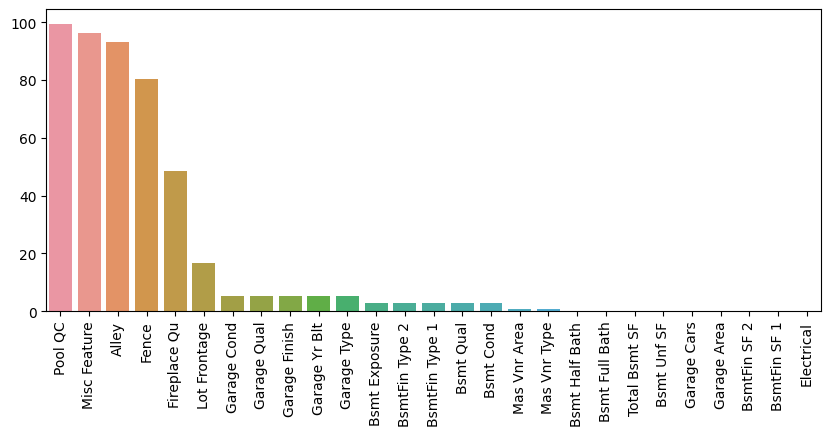

In [5]:
# Null values
nan = df.isnull().sum() [df.isnull().sum() > 0]
nan = nan.sort_values(ascending=False)
nan = round(nan.div(len(df)) * 100, 2)

plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=nan.index, y=nan.values)
plt.xticks(rotation=90);

Dropping columns with more than 40 percent missing data and they are categorical features

In [6]:
nan_columns = nan[nan>40].index.to_list()

In [7]:
df[nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pool QC       13 non-null     object
 1   Misc Feature  106 non-null    object
 2   Alley         198 non-null    object
 3   Fence         572 non-null    object
 4   Fireplace Qu  1508 non-null   object
dtypes: object(5)
memory usage: 114.6+ KB


In [8]:
df = df.drop(nan_columns, axis=1)
df = df.drop(['Garage Yr Blt'], axis=1)

Fill 'NA' for 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond' because the garage is not present

In [9]:
for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    df[col] = df[col].fillna('NA')

Fill 'NA' for 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2' because the basement is not present

In [10]:
for col in ('Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'):
    df[col] = df[col].fillna('None')

Replacing Nan for Vnr because it is not present

In [11]:
for col in ('Mas Vnr Type', 'Mas Vnr Area'):
    df[col] = df[col].fillna(0)

Fill 0 if Garage or car is not present

In [12]:
for col in ('Garage Area', 'Garage Cars'):
    df[col] = df[col].fillna(0)

Rest of the columns with null values

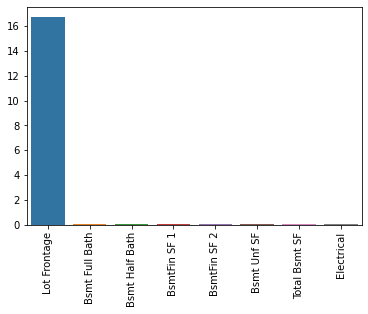

In [13]:
# New null values
nan = df.isnull().sum() [df.isnull().sum() > 0]
nan = nan.sort_values(ascending=False)
nan = round(nan.div(len(df)) * 100, 2)

# plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=nan.index, y=nan.values)
plt.xticks(rotation=90);

In [14]:
nan = nan.index.to_list()[1:]

In [15]:
df.shape

(2930, 75)

Dropping 3 rows will not affect our solution

In [16]:
df = df.dropna(subset=nan)
df.shape

(2927, 75)

Only Lot Frontage column is present with the null values, we handled the rest pretty well

In [17]:
df.isnull().sum()[df.isnull().sum()>0]

Lot Frontage    490
dtype: int64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

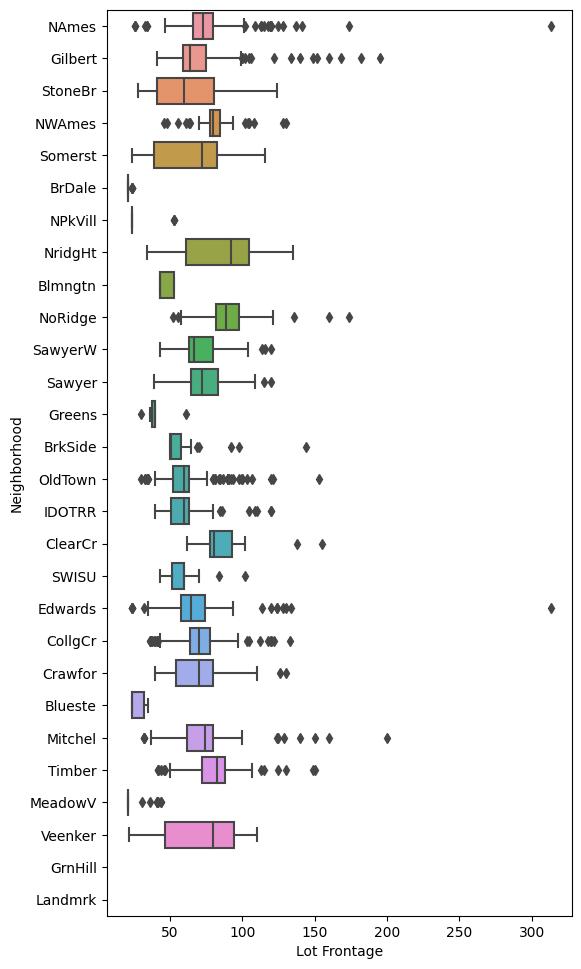

In [18]:
plt.figure(figsize=(6,12), dpi=100)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df, orient='h')

In [19]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x:x.fillna(x.mean()))

In [20]:
df = df.dropna()

In [21]:
df.shape

(2924, 75)

## EDA

In [22]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qu

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

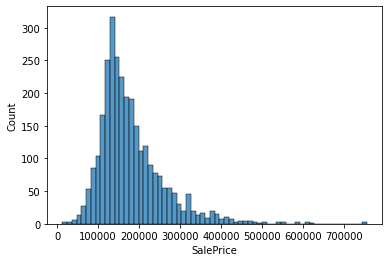

In [23]:
sns.histplot(data=df, x=df['SalePrice'])

<AxesSubplot:>

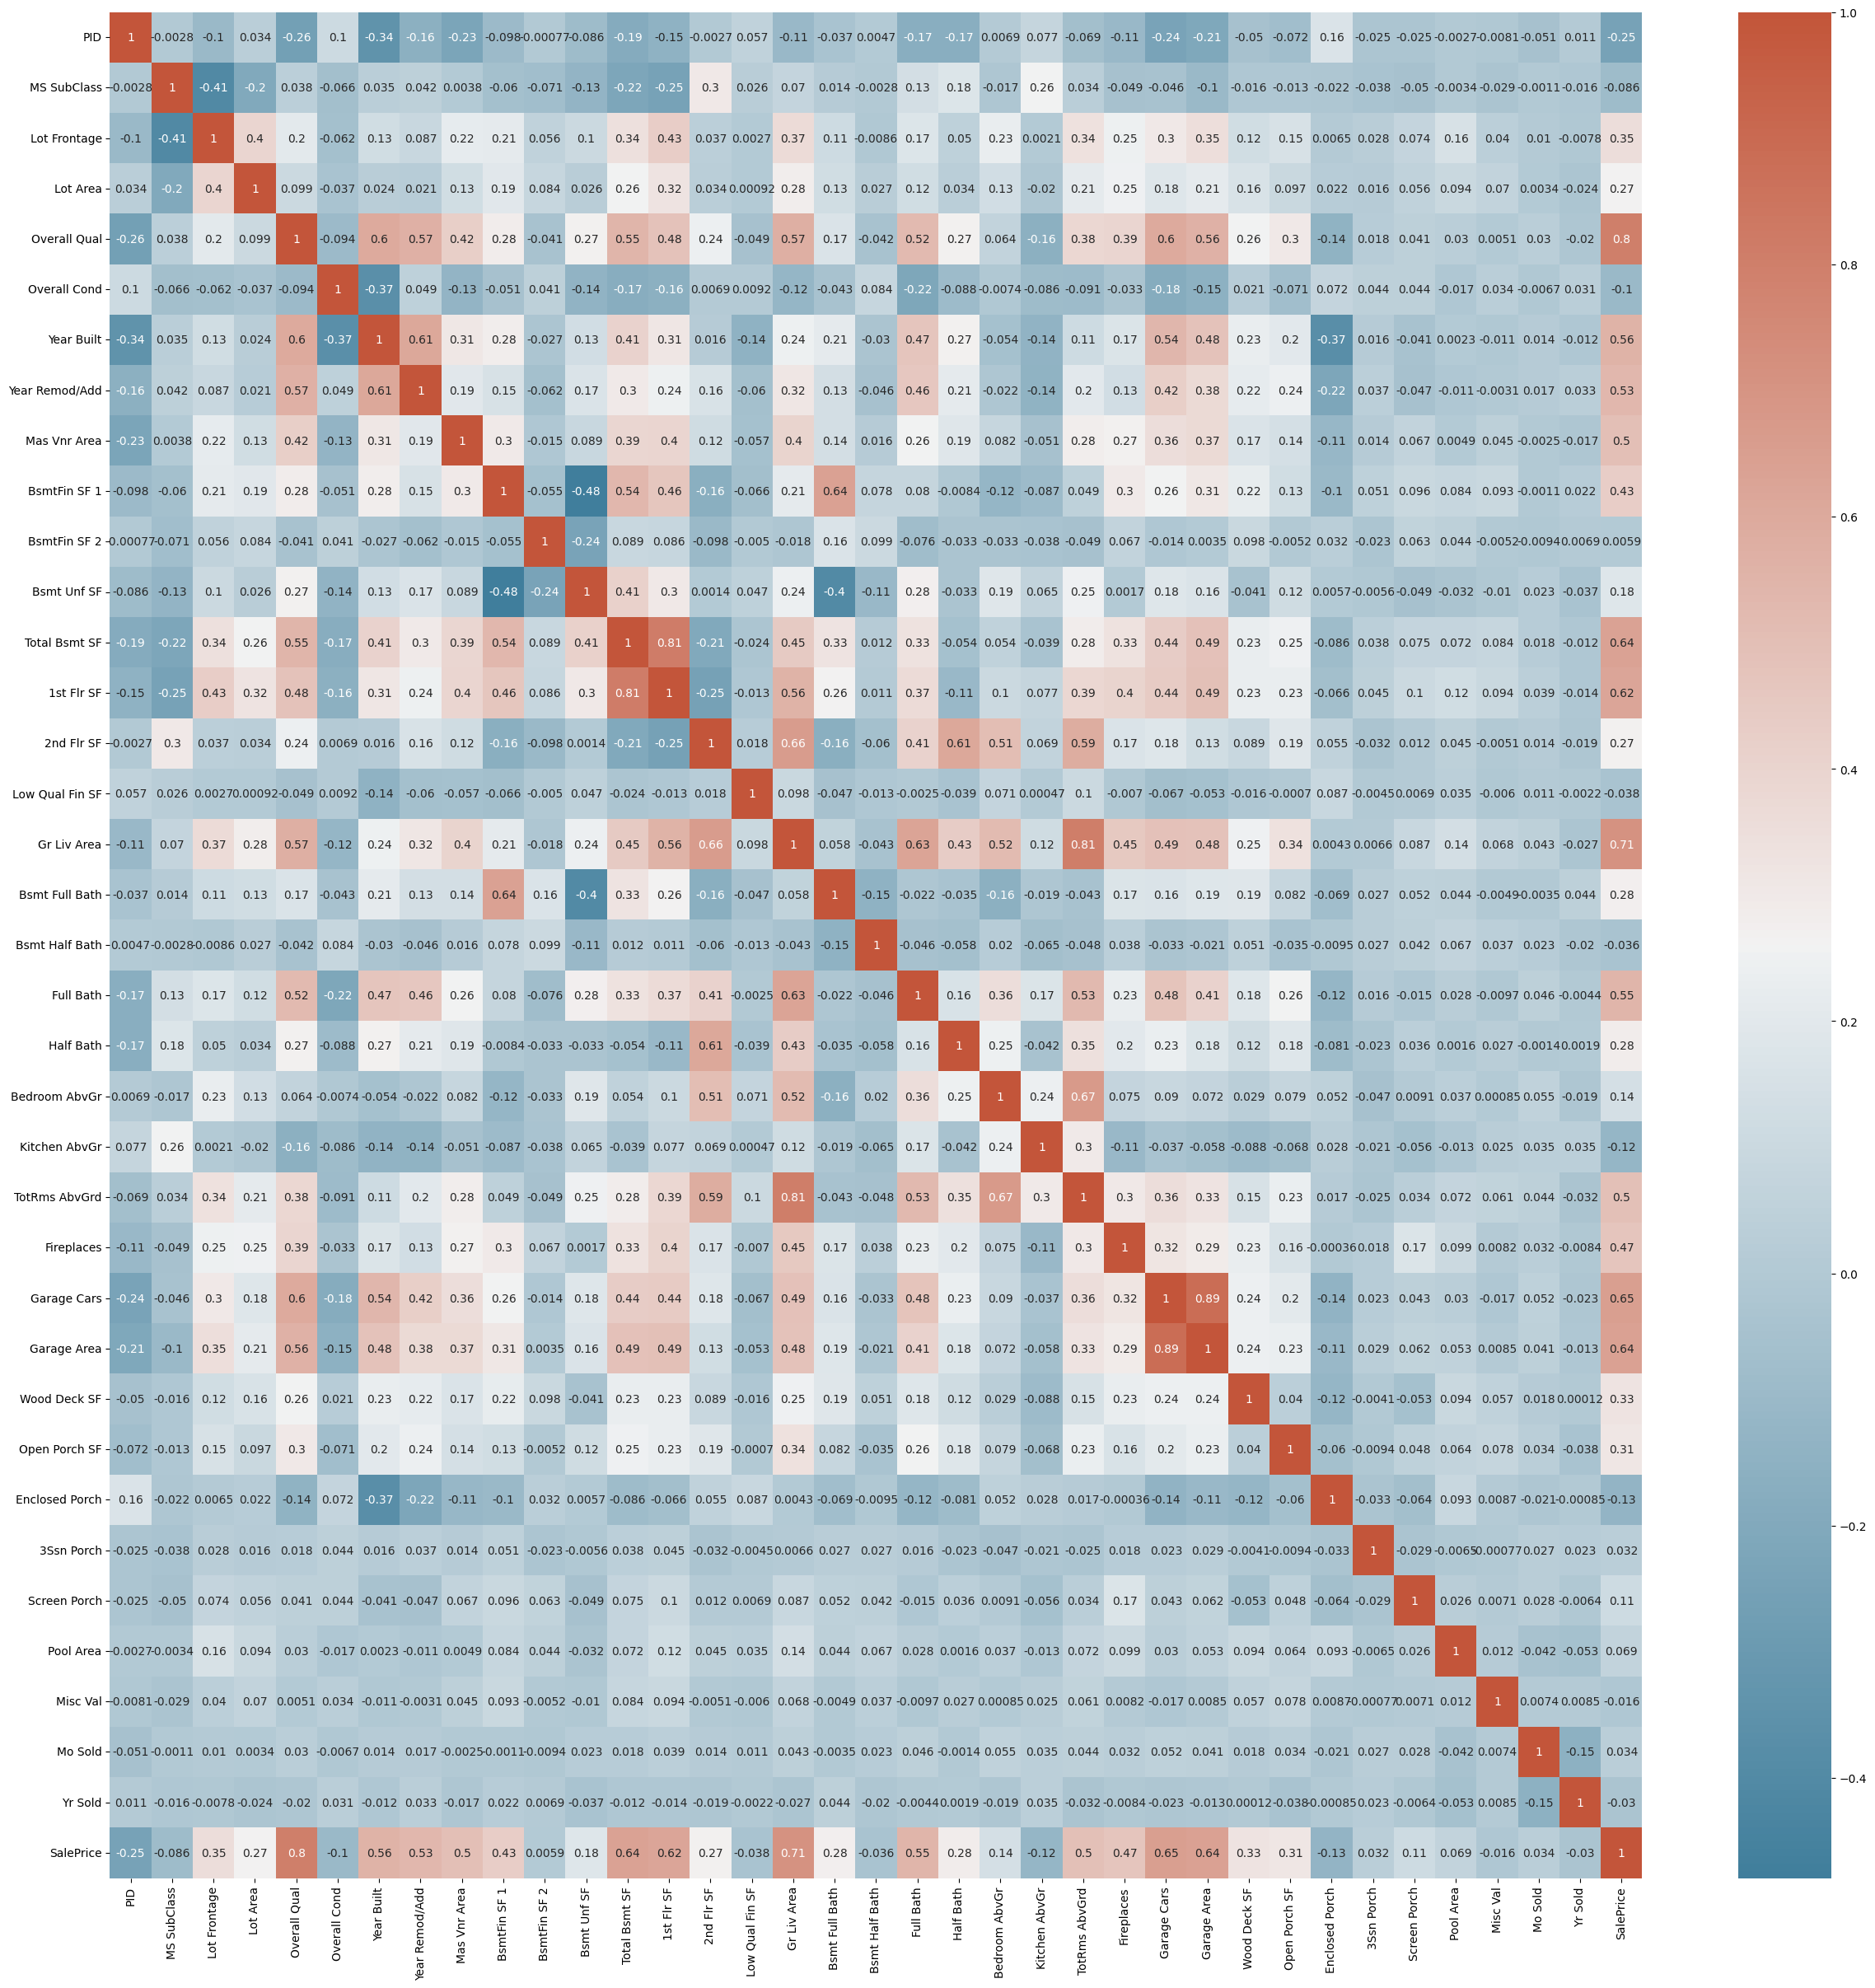

In [24]:
plt.figure(figsize=(30,30), dpi=100)
sns.heatmap(data=df.corr(), annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))

Highly correlated features
- Overall quality
- Gr liv area
- Garage area
- Total Basement SF
- 1st floor SF

In [25]:
categorical_features = df.dtypes[df.dtypes=='object'].index.to_list()
print(categorical_features)

['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition']


<AxesSubplot:xlabel='Misc Val', ylabel='Count'>

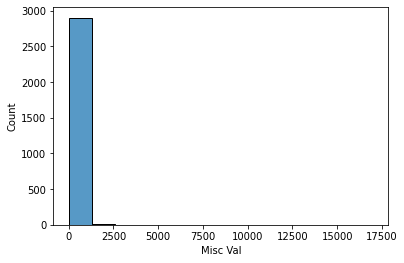

In [26]:
sns.histplot(data=df, x='Misc Val')

<AxesSubplot:xlabel='Misc Val', ylabel='SalePrice'>

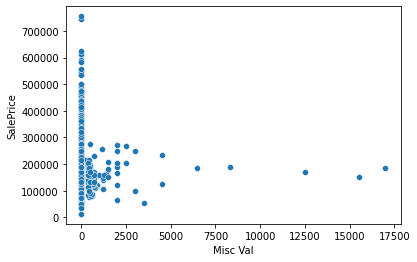

In [27]:
sns.scatterplot(data=df, x='Misc Val', y='SalePrice')

<AxesSubplot:xlabel='Mo Sold', ylabel='SalePrice'>

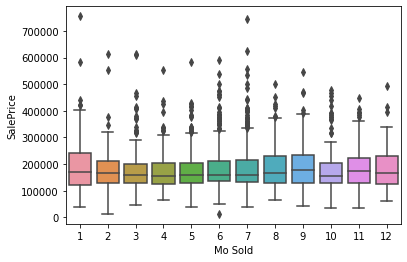

In [28]:
sns.boxplot(data=df, x='Mo Sold', y='SalePrice')

<AxesSubplot:xlabel='Yr Sold', ylabel='SalePrice'>

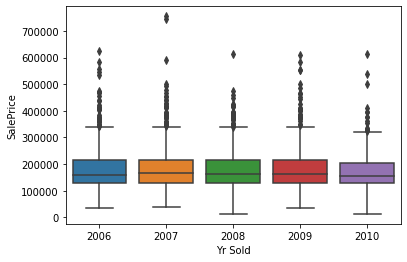

In [29]:
sns.boxplot(data=df, x='Yr Sold', y='SalePrice')

<AxesSubplot:xlabel='Low Qual Fin SF', ylabel='SalePrice'>

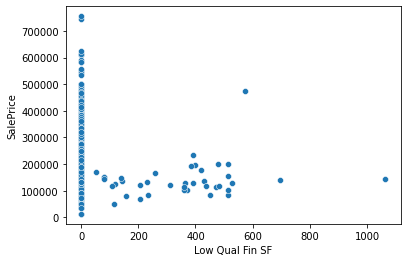

In [30]:
sns.scatterplot(data=df, x='Low Qual Fin SF', y='SalePrice')

<AxesSubplot:xlabel='BsmtFin SF 2', ylabel='Count'>

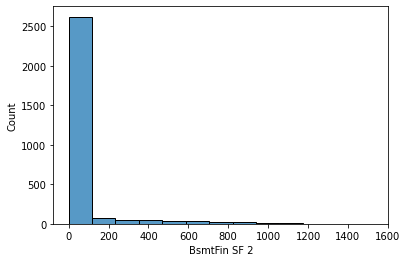

In [31]:
sns.histplot(data=df, x='BsmtFin SF 2')

<AxesSubplot:xlabel='BsmtFin SF 2', ylabel='SalePrice'>

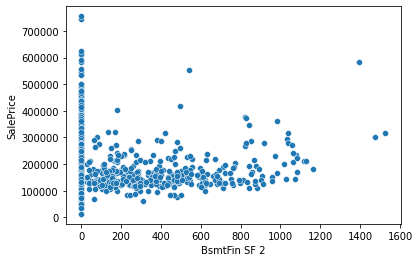

In [32]:
sns.scatterplot(data=df,  x='BsmtFin SF 2', y='SalePrice')

<AxesSubplot:xlabel='MS SubClass', ylabel='SalePrice'>

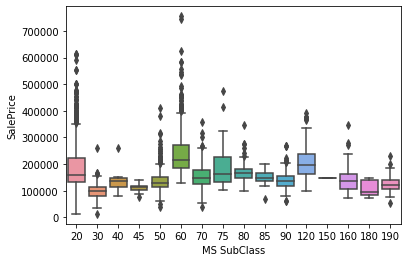

In [33]:
sns.boxplot(data=df, x='MS SubClass', y='SalePrice')

In [34]:
# Dropping unwanted features
df = df.drop(['PID', 'Garage Area', 'Mo Sold', 'Yr Sold', 'Misc Val', 'MS SubClass', 'BsmtFin SF 2', 'Low Qual Fin SF', 'Yr Sold', 'Mo Sold', 'Misc Val'], axis=1)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

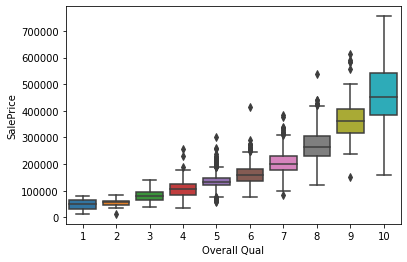

In [35]:
sns.boxplot(data=df, x='Overall Qual', y='SalePrice')

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

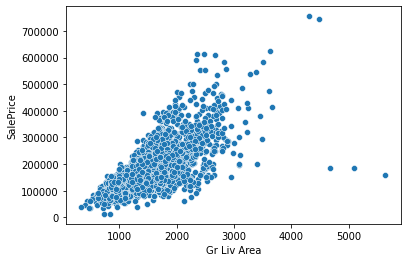

In [36]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

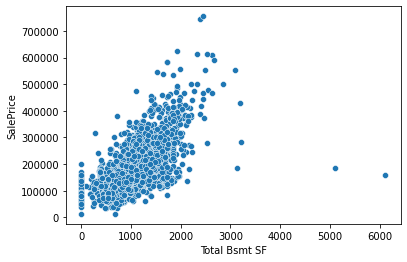

In [37]:
sns.scatterplot(data=df, x='Total Bsmt SF', y='SalePrice')

<AxesSubplot:xlabel='Garage Cars', ylabel='count'>

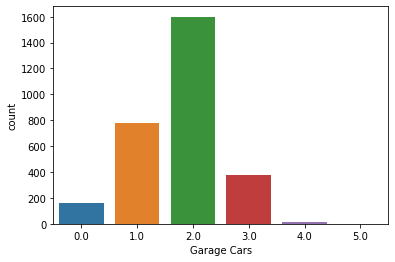

In [38]:
sns.countplot(data=df, x='Garage Cars')

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

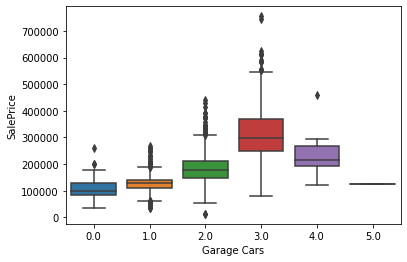

In [39]:
sns.boxplot(data=df, x='Garage Cars', y='SalePrice')

In [40]:
my_object_df = df.select_dtypes(include='object')
my_numeric_df = df.select_dtypes(exclude='object')

In [41]:
my_object_df.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [42]:
len(my_object_df.columns)

38

In [43]:
my_numeric_df.columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Cars', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',
       'SalePrice'],
      dtype='object')

In [44]:
len(my_numeric_df.columns)

29

In [45]:
df_objects_dummies = pd.get_dummies(my_object_df, drop_first=True)

In [46]:
final_df = pd.concat([my_numeric_df, df_objects_dummies], axis=1)

In [47]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_None,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_None,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_None,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_None,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_NA,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_NA,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale 

In [48]:
final_df.shape

(2924, 247)

In [49]:
final_df['log_price'] = np.log1p(final_df['SalePrice'])

## Modeling

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
X = final_df.drop(['SalePrice','log_price'], axis=1)
y = final_df.log_price

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [54]:
GBoost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

In [55]:
preds = GBoost.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,preds)))

0.10610658399731195


In [56]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [57]:
xgboost.fit(X_train, y_train)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, min_child_weight=0,
             n_estimators=3460, nthread=-1, reg_alpha=6e-05, seed=27,
             subsample=0.7)

In [58]:
preds = xgboost.predict(X_test)

In [59]:
np.sqrt(mean_squared_error(preds, y_test))

0.11142382000288326

## Feature Importance

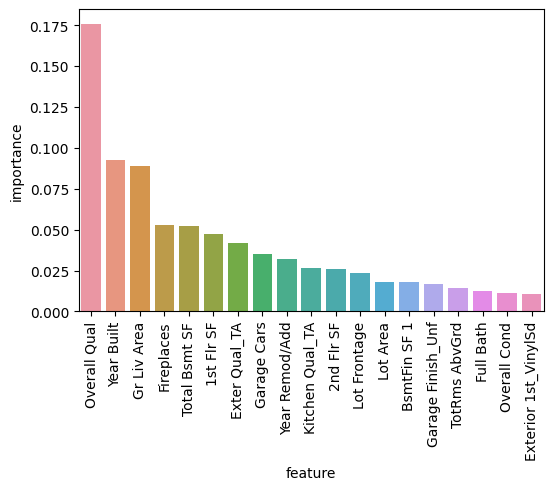

In [69]:
# GradientBoostingRegressor
features = GBoost.feature_importances_
features = pd.DataFrame(index=X.columns, data=features, columns=['importance'])
features = features[features.importance>0.01].reset_index()
features.columns = ['feature', 'importance']
features = features.sort_values(by='importance', ascending=False)
plt.figure(figsize=(6,4), dpi=100)
sns.barplot(data=features, x=features.feature, y=features.importance)
plt.xticks(rotation=90);

In [78]:
import shap

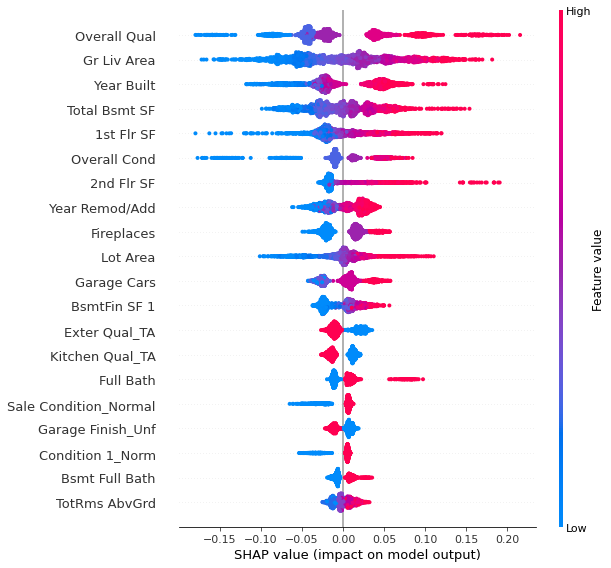

In [79]:
shap_values = shap.TreeExplainer(GBoost).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

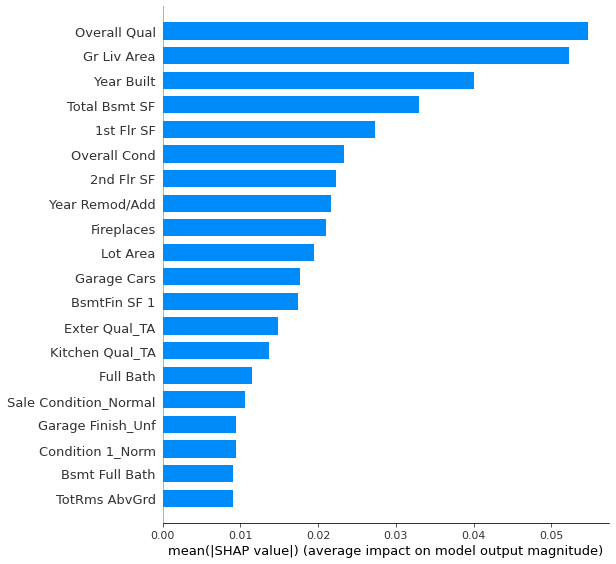

In [80]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

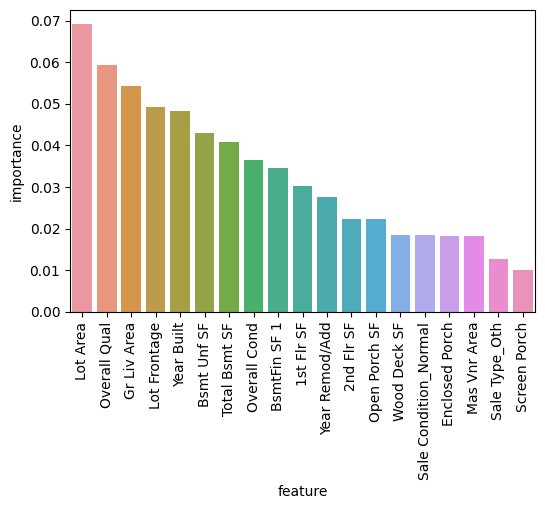

In [70]:
# XGB
features = xgboost.feature_importances_
features = pd.DataFrame(index=X.columns, data=features, columns=['importance'])
features = features[features.importance>0.01].reset_index()
features.columns = ['feature', 'importance']
features = features.sort_values(by='importance', ascending=False)
plt.figure(figsize=(6,4), dpi=100)
sns.barplot(data=features, x=features.feature, y=features.importance)
plt.xticks(rotation=90);

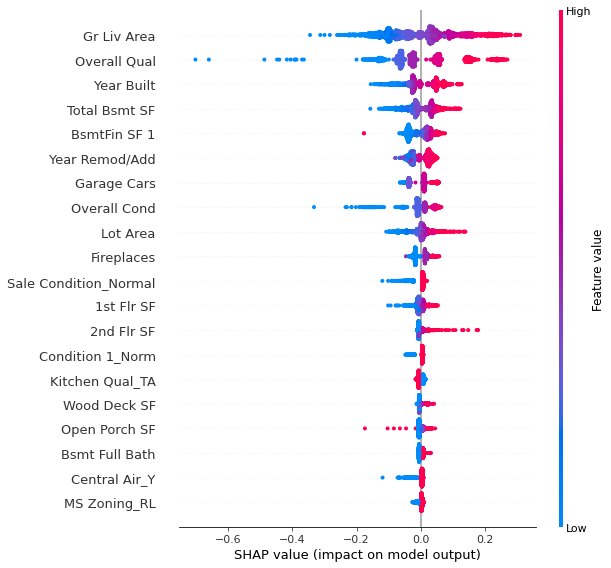

In [75]:
shap_values = shap.TreeExplainer(xgboost).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

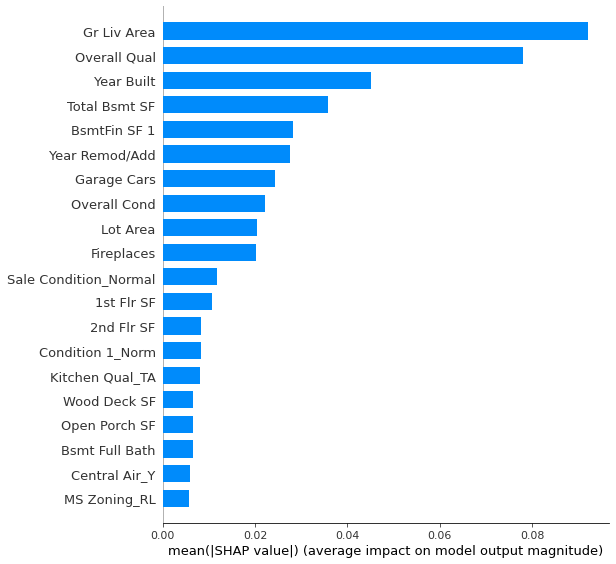

In [76]:
shap.summary_plot(shap_values, X_train, plot_type="bar")